# Ml model for Gender Prediciton

## Dataset and Library Importation

In [220]:
import pandas as pd
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot


In [221]:
data = pd.read_csv("ML_dataset_0930.csv")
data.head()

,Unnamed: 0,filename,lawyer_male,percent,max,min,mean,median,stdev,min_in,...,q91,q92,q93,q94,q95,q96,q97,q98,q99,q100
0,1,120222015200547280299,1,0.0,258.11872,105.42314,130.2302,124.03377,29.27223,21.75107,...,136.41411,137.44948,139.11002,150.97418,233.89897,242.42514,253.86877,255.11467,255.86677,259.05867
1,2,12022237318030335018,1,0.0,341.0521,174.30794,229.27221,222.32459,36.14343,28.10591,...,283.20606,284.65229,285.03504,285.14059,294.86228,306.1213,311.62433,318.55998,327.6212,344.57995
2,3,12022237340030114014,1,0.0,190.87783,81.00901,111.19673,108.17011,21.815,28.75928,...,139.80518,141.01955,146.64117,148.4232,150.16875,159.46629,173.48027,175.95107,182.00563,193.21693
3,4,12022237343030224016,1,0.0,133.90526,89.74382,108.61958,105.47788,11.86239,19.00371,...,128.21476,129.12292,130.28582,131.14202,131.73361,132.17219,132.43985,132.61862,132.68908,134.46538
4,5,12022237352030003012,1,0.0,244.77814,51.16954,103.40267,97.34576,23.43879,21.67640,...,128.58647,130.42046,131.86908,132.25946,132.85974,133.49579,133.96456,160.30325,244.39978,244.78109


## Preprocessing the Dataset

In [222]:
data.lawyer_male.value_counts()
# Male : Female = 2.38
## this requires over-sampling in the training dataset

1    1535
0     646
Name: lawyer_male, dtype: int64

In [223]:
acoustics=data.columns[4:]

In [224]:
for item in acoustics:
    data[item] = data[item].apply(pd.to_numeric,errors="coerce",downcast="float")

## Split the Train and Test Dataset

In [225]:
X = data[data.columns[4:]]
y = data["lawyer_male"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10000)

In [226]:
y_train.value_counts()

1    1069
0     457
Name: lawyer_male, dtype: int64

### Over-sample Female Lawyers

In [227]:
column_name_list = X_train.columns
column_name_list

Index(['max', 'min', 'mean', 'median', 'stdev', 'min_in', 'q1', 'q2', 'q3',
       'q4',
       ...
       'q91', 'q92', 'q93', 'q94', 'q95', 'q96', 'q97', 'q98', 'q99', 'q100'],
      dtype='object', length=106)

In [228]:
mean_imputer = Imputer(strategy="mean",axis=0)
mean_imputer = mean_imputer.fit(X_train)
imputed_train = mean_imputer.transform(X_train.values)
New_train = pd.DataFrame(imputed_train,columns=[X_train.columns])
X_train = New_train

In [229]:
sm = SMOTE(random_state=20,ratio=1.0)

In [230]:
x_train_res,y_train_res = sm.fit_sample(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [231]:
x_train_res = pd.DataFrame(x_train_res)

In [232]:
name_dic = {}
for col in range(len(column_name_list)):
    name = column_name_list[col]
    name_dic[col] = name

In [233]:
x_train_res.rename(columns=name_dic,inplace=True)
x_train_res.head()

,max,min,mean,median,stdev,min_in,q1,q2,q3,q4,...,q91,q92,q93,q94,q95,q96,q97,q98,q99,q100
0,262.356079,56.168179,202.483551,202.525513,37.640381,16.70875,56.294708,56.365898,57.809460,66.912361,...,243.296463,245.491501,249.288071,252.164917,254.642883,256.333160,257.236786,257.840515,258.216278,263.471100
1,345.215485,54.231628,124.882919,116.161469,49.604919,32.35488,66.028358,66.608971,78.089592,87.183762,...,133.173615,133.442673,135.504089,137.200378,138.002197,333.648865,340.327332,342.745453,344.165710,345.519501
2,132.447906,113.531212,125.607193,125.106163,3.376840,-0.76444,115.910583,120.025063,121.141800,121.152283,...,130.785385,130.888367,130.914948,131.118759,131.146286,131.189331,131.288864,131.677795,132.165543,132.683212
3,364.849426,51.074718,116.000488,94.708778,50.299068,25.01096,55.303551,75.930130,77.014351,77.992683,...,181.331985,182.202759,182.592865,188.967575,194.150497,195.471436,196.745697,360.984436,361.942169,365.925690
4,215.543671,74.989304,107.615479,94.309036,38.602791,-300.00000,75.136948,75.232513,75.357582,75.475288,...,167.227859,174.492996,186.714905,197.632034,206.534454,210.378021,211.917374,213.805496,214.960205,215.484467


In [234]:
len(y_train_res[y_train_res==1]) 

1069

### Standardize Features

In [148]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### PCA Analysis

In [149]:
pca = PCA(.99)

In [150]:
pca.fit(x_train_res)
pca.n_components_

10

In [151]:
x_train_res = pca.transform(x_train_res)
X_test = pca.transform(X_test)

In [152]:
x_train_res = pd.DataFrame(x_train_res)
X_test = pd.DataFrame(X_test)

In [153]:
x_train_res.rename(columns={0:"com_1",1:"com_2",2:"com_3",3:"com_4"},inplace=True)
X_test.rename(columns={0:"com_1",1:"com_2",2:"com_3",3:"com_4"},inplace=True)

## XGBoost Model Training

In [235]:
xg_train = xgb.DMatrix(x_train_res,label=y_train_res)
xg_test = xgb.DMatrix(X_test,label=y_test)

eval_set = [(xg_train,"Train"),(xg_test,"Test")] # comfusion

xgb_params = {
    'eta': 0.05,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': ['error', 'logloss'],
    'subsample': 1,
    'colsample_bytree': 1,
    'seed': 2333,
    'silent': 1
}


### Tune Parameters: max_depth, min_child_weight, subsample, colsample

In [155]:
gridsearch_params = [
    (max_depth, min_child_weight, subsample, colsample)
    for max_depth in range(3, 8)
    for min_child_weight in range(2, 6)
    for subsample in [0.7, 0.8, 0.9, 1.0]
    for colsample in [0.7, 0.8, 0.9, 1.0]
]
min_logloss = float("Inf")
best_params = None

In [156]:
for max_depth, min_child_weight, subsample, colsample in gridsearch_params:
    print("CV with max_depth = {}, min_child_weight = {}, subsample = {}, colsample = {}".format(
        max_depth,
        min_child_weight,
        subsample,
        colsample
    ))
    xgb_params['max_depth'] = max_depth
    xgb_params['min_child_weight'] = min_child_weight
    xgb_params['subsample'] = subsample
    xgb_params['colsample'] = colsample
    
    
    cv_result = xgb.cv(xgb_params,xg_train,num_boost_round=1000,nfold=5,early_stopping_rounds=10,seed=2333, metrics=['error', 'logloss'])
    mean_logloss = cv_result['test-logloss-mean'].min()
    boost_rounds = cv_result['test-logloss-mean'].idxmin()
    print("\tMLL {} for {} rounds".format(mean_logloss, boost_rounds))
    
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        optimal_boost_rounds = boost_rounds
        best_params = (max_depth,min_child_weight,subsample,colsample)
    print("Best params:max_depth {}, min_child_weight {}, subsample {}, colsample {}, MLL: {}, round {}".format(
        best_params[0], best_params[1], best_params[2], best_params[3], min_logloss, optimal_boost_rounds))

CV with max_depth = 3, min_child_weight = 2, subsample = 0.7, colsample = 0.7
	MLL 0.3082072 for 206 rounds
Best params:max_depth 3, min_child_weight 2, subsample 0.7, colsample 0.7, MLL: 0.3082072, round 206
CV with max_depth = 3, min_child_weight = 2, subsample = 0.7, colsample = 0.8
	MLL 0.3082072 for 206 rounds
Best params:max_depth 3, min_child_weight 2, subsample 0.7, colsample 0.7, MLL: 0.3082072, round 206
CV with max_depth = 3, min_child_weight = 2, subsample = 0.7, colsample = 0.9
	MLL 0.3082072 for 206 rounds
Best params:max_depth 3, min_child_weight 2, subsample 0.7, colsample 0.7, MLL: 0.3082072, round 206
CV with max_depth = 3, min_child_weight = 2, subsample = 0.7, colsample = 1.0
	MLL 0.3082072 for 206 rounds
Best params:max_depth 3, min_child_weight 2, subsample 0.7, colsample 0.7, MLL: 0.3082072, round 206
CV with max_depth = 3, min_child_weight = 2, subsample = 0.8, colsample = 0.7
	MLL 0.308181 for 223 rounds
Best params:max_depth 3, min_child_weight 2, subsample 0.

	MLL 0.3073972 for 269 rounds
Best params:max_depth 3, min_child_weight 3, subsample 0.7, colsample 0.7, MLL: 0.3053834, round 272
CV with max_depth = 3, min_child_weight = 4, subsample = 0.9, colsample = 0.7
	MLL 0.3131392 for 200 rounds
Best params:max_depth 3, min_child_weight 3, subsample 0.7, colsample 0.7, MLL: 0.3053834, round 272
CV with max_depth = 3, min_child_weight = 4, subsample = 0.9, colsample = 0.8
	MLL 0.3131392 for 200 rounds
Best params:max_depth 3, min_child_weight 3, subsample 0.7, colsample 0.7, MLL: 0.3053834, round 272
CV with max_depth = 3, min_child_weight = 4, subsample = 0.9, colsample = 0.9
	MLL 0.3131392 for 200 rounds
Best params:max_depth 3, min_child_weight 3, subsample 0.7, colsample 0.7, MLL: 0.3053834, round 272
CV with max_depth = 3, min_child_weight = 4, subsample = 0.9, colsample = 1.0
	MLL 0.3131392 for 200 rounds
Best params:max_depth 3, min_child_weight 3, subsample 0.7, colsample 0.7, MLL: 0.3053834, round 272
CV with max_depth = 3, min_child_

	MLL 0.30327560000000003 for 196 rounds
Best params:max_depth 4, min_child_weight 2, subsample 0.7, colsample 0.7, MLL: 0.2964714, round 181
CV with max_depth = 4, min_child_weight = 2, subsample = 1.0, colsample = 1.0
	MLL 0.30327560000000003 for 196 rounds
Best params:max_depth 4, min_child_weight 2, subsample 0.7, colsample 0.7, MLL: 0.2964714, round 181
CV with max_depth = 4, min_child_weight = 3, subsample = 0.7, colsample = 0.7
	MLL 0.2984082 for 164 rounds
Best params:max_depth 4, min_child_weight 2, subsample 0.7, colsample 0.7, MLL: 0.2964714, round 181
CV with max_depth = 4, min_child_weight = 3, subsample = 0.7, colsample = 0.8
	MLL 0.2984082 for 164 rounds
Best params:max_depth 4, min_child_weight 2, subsample 0.7, colsample 0.7, MLL: 0.2964714, round 181
CV with max_depth = 4, min_child_weight = 3, subsample = 0.7, colsample = 0.9
	MLL 0.2984082 for 164 rounds
Best params:max_depth 4, min_child_weight 2, subsample 0.7, colsample 0.7, MLL: 0.2964714, round 181
CV with max_d

	MLL 0.3022582 for 203 rounds
Best params:max_depth 4, min_child_weight 2, subsample 0.7, colsample 0.7, MLL: 0.2964714, round 181
CV with max_depth = 4, min_child_weight = 5, subsample = 0.8, colsample = 0.9
	MLL 0.3022582 for 203 rounds
Best params:max_depth 4, min_child_weight 2, subsample 0.7, colsample 0.7, MLL: 0.2964714, round 181
CV with max_depth = 4, min_child_weight = 5, subsample = 0.8, colsample = 1.0
	MLL 0.3022582 for 203 rounds
Best params:max_depth 4, min_child_weight 2, subsample 0.7, colsample 0.7, MLL: 0.2964714, round 181
CV with max_depth = 4, min_child_weight = 5, subsample = 0.9, colsample = 0.7
	MLL 0.3034726 for 185 rounds
Best params:max_depth 4, min_child_weight 2, subsample 0.7, colsample 0.7, MLL: 0.2964714, round 181
CV with max_depth = 4, min_child_weight = 5, subsample = 0.9, colsample = 0.8
	MLL 0.3034726 for 185 rounds
Best params:max_depth 4, min_child_weight 2, subsample 0.7, colsample 0.7, MLL: 0.2964714, round 181
CV with max_depth = 4, min_child_

	MLL 0.2988022 for 199 rounds
Best params:max_depth 5, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.289906, round 181
CV with max_depth = 5, min_child_weight = 3, subsample = 1.0, colsample = 0.8
	MLL 0.2988022 for 199 rounds
Best params:max_depth 5, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.289906, round 181
CV with max_depth = 5, min_child_weight = 3, subsample = 1.0, colsample = 0.9
	MLL 0.2988022 for 199 rounds
Best params:max_depth 5, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.289906, round 181
CV with max_depth = 5, min_child_weight = 3, subsample = 1.0, colsample = 1.0
	MLL 0.2988022 for 199 rounds
Best params:max_depth 5, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.289906, round 181
CV with max_depth = 5, min_child_weight = 4, subsample = 0.7, colsample = 0.7
	MLL 0.2952846 for 163 rounds
Best params:max_depth 5, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.289906, round 181
CV with max_depth = 5, min_child_weigh

	MLL 0.2905328 for 133 rounds
Best params:max_depth 5, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.289906, round 181
CV with max_depth = 6, min_child_weight = 2, subsample = 0.8, colsample = 0.7
	MLL 0.2896144 for 150 rounds
Best params:max_depth 6, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.2896144, round 150
CV with max_depth = 6, min_child_weight = 2, subsample = 0.8, colsample = 0.8
	MLL 0.2896144 for 150 rounds
Best params:max_depth 6, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.2896144, round 150
CV with max_depth = 6, min_child_weight = 2, subsample = 0.8, colsample = 0.9
	MLL 0.2896144 for 150 rounds
Best params:max_depth 6, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.2896144, round 150
CV with max_depth = 6, min_child_weight = 2, subsample = 0.8, colsample = 1.0
	MLL 0.2896144 for 150 rounds
Best params:max_depth 6, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.2896144, round 150
CV with max_depth = 6, min_child_w

	MLL 0.2957774 for 191 rounds
Best params:max_depth 6, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.2896144, round 150
CV with max_depth = 6, min_child_weight = 4, subsample = 0.9, colsample = 1.0
	MLL 0.2957774 for 191 rounds
Best params:max_depth 6, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.2896144, round 150
CV with max_depth = 6, min_child_weight = 4, subsample = 1.0, colsample = 0.7
	MLL 0.2964146 for 154 rounds
Best params:max_depth 6, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.2896144, round 150
CV with max_depth = 6, min_child_weight = 4, subsample = 1.0, colsample = 0.8
	MLL 0.2964146 for 154 rounds
Best params:max_depth 6, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.2896144, round 150
CV with max_depth = 6, min_child_weight = 4, subsample = 1.0, colsample = 0.9
	MLL 0.2964146 for 154 rounds
Best params:max_depth 6, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.2896144, round 150
CV with max_depth = 6, min_child_

	MLL 0.2895198 for 156 rounds
Best params:max_depth 7, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.2862958, round 150
CV with max_depth = 7, min_child_weight = 3, subsample = 0.7, colsample = 1.0
	MLL 0.2895198 for 156 rounds
Best params:max_depth 7, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.2862958, round 150
CV with max_depth = 7, min_child_weight = 3, subsample = 0.8, colsample = 0.7
	MLL 0.2879582 for 157 rounds
Best params:max_depth 7, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.2862958, round 150
CV with max_depth = 7, min_child_weight = 3, subsample = 0.8, colsample = 0.8
	MLL 0.2879582 for 157 rounds
Best params:max_depth 7, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.2862958, round 150
CV with max_depth = 7, min_child_weight = 3, subsample = 0.8, colsample = 0.9
	MLL 0.2879582 for 157 rounds
Best params:max_depth 7, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.2862958, round 150
CV with max_depth = 7, min_child_

	MLL 0.2968244 for 181 rounds
Best params:max_depth 7, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.2862958, round 150
CV with max_depth = 7, min_child_weight = 5, subsample = 0.9, colsample = 0.9
	MLL 0.2968244 for 181 rounds
Best params:max_depth 7, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.2862958, round 150
CV with max_depth = 7, min_child_weight = 5, subsample = 0.9, colsample = 1.0
	MLL 0.2968244 for 181 rounds
Best params:max_depth 7, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.2862958, round 150
CV with max_depth = 7, min_child_weight = 5, subsample = 1.0, colsample = 0.7
	MLL 0.2981936 for 153 rounds
Best params:max_depth 7, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.2862958, round 150
CV with max_depth = 7, min_child_weight = 5, subsample = 1.0, colsample = 0.8
	MLL 0.2981936 for 153 rounds
Best params:max_depth 7, min_child_weight 2, subsample 0.8, colsample 0.7, MLL: 0.2862958, round 150
CV with max_depth = 7, min_child_

### Optimal xgb_params Based on Tuning

In [244]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 7,
    'min_child_weight': 2,
    'objective': 'binary:logistic',
    'eval_metric': ['error', 'logloss'],
    'subsample': 0.8,
    'colsample_bytree': 0.7,
    'seed': 2333,
    'silent': 1
}

In [245]:
tuned_model = xgb.train(xgb_params, xg_train, num_boost_round=1000,evals=eval_set, early_stopping_rounds=10)

[0]	Train-error:0.094949	Train-logloss:0.659706	Test-error:0.157252	Test-logloss:0.662459
Multiple eval metrics have been passed: 'Test-logloss' will be used for early stopping.

Will train until Test-logloss hasn't improved in 10 rounds.
[1]	Train-error:0.079046	Train-logloss:0.628761	Test-error:0.140458	Test-logloss:0.634386
[2]	Train-error:0.074369	Train-logloss:0.600989	Test-error:0.138931	Test-logloss:0.608756
[3]	Train-error:0.07203	Train-logloss:0.575845	Test-error:0.140458	Test-logloss:0.586638
[4]	Train-error:0.071094	Train-logloss:0.55252	Test-error:0.131298	Test-logloss:0.566088
[5]	Train-error:0.070627	Train-logloss:0.530706	Test-error:0.137405	Test-logloss:0.547472
[6]	Train-error:0.069691	Train-logloss:0.50976	Test-error:0.131298	Test-logloss:0.529532
[7]	Train-error:0.068756	Train-logloss:0.490598	Test-error:0.137405	Test-logloss:0.513728
[8]	Train-error:0.06782	Train-logloss:0.47259	Test-error:0.132824	Test-logloss:0.498856
[9]	Train-error:0.065014	Train-logloss:0.45608

[89]	Train-error:0.030402	Train-logloss:0.124707	Test-error:0.131298	Test-logloss:0.302081
[90]	Train-error:0.03087	Train-logloss:0.123418	Test-error:0.131298	Test-logloss:0.302
[91]	Train-error:0.029935	Train-logloss:0.122071	Test-error:0.131298	Test-logloss:0.302374
[92]	Train-error:0.028999	Train-logloss:0.120918	Test-error:0.132824	Test-logloss:0.302204
[93]	Train-error:0.029467	Train-logloss:0.119638	Test-error:0.132824	Test-logloss:0.302394
[94]	Train-error:0.028064	Train-logloss:0.118674	Test-error:0.132824	Test-logloss:0.302317
Stopping. Best iteration:
[84]	Train-error:0.032273	Train-logloss:0.129901	Test-error:0.132824	Test-logloss:0.301202



In [247]:
num_boost_round = tuned_model.best_iteration+1

cv_result = xgb.cv(xgb_params, xg_train, num_boost_round=num_boost_round, nfold=5, 
                   seed=2333, metrics=['error', 'logloss'])

In [218]:
cv_result

,test-error-mean,test-error-std,test-logloss-mean,test-logloss-std,train-error-mean,train-error-std,train-logloss-mean,train-logloss-std
0,0.182460,0.042975,0.667883,0.004511,0.133529,0.026453,0.664040,0.003072
1,0.147812,0.015980,0.641849,0.004844,0.098807,0.003298,0.635172,0.003213
2,0.142195,0.016890,0.621215,0.005613,0.096001,0.005218,0.610956,0.004231
3,0.137510,0.014115,0.599688,0.005739,0.090272,0.004159,0.586906,0.004365
4,0.134698,0.016502,0.579622,0.005578,0.090506,0.004552,0.564235,0.004107
5,0.133772,0.012242,0.563353,0.005990,0.087816,0.004495,0.545168,0.003688
6,0.128159,0.012506,0.545939,0.006022,0.086062,0.005148,0.525581,0.003658
7,0.123480,0.008539,0.535912,0.003142,0.085126,0.003926,0.512516,0.003849
8,0.124884,0.010308,0.522236,0.002481,0.085126,0.002920,0.496219,0.005369
9,0.126283,0.012071,0.510418,0.004749,0.084425,0.004575,0.481237,0.005141


## Plot Analysis

### Feature Importance Plot

<function matplotlib.pyplot.show>

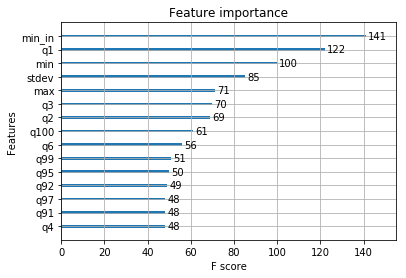

In [248]:
plot_importance(tuned_model,max_num_features=15)
pyplot.show

### Performance Plot

In [249]:
epochs = len(cv_result['test-logloss-mean'])
x_axis = range(0, epochs)

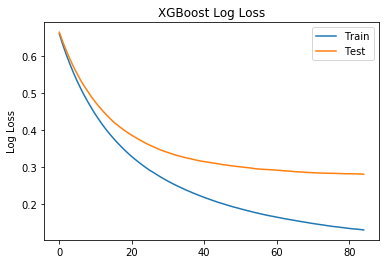

In [250]:
fig, ax = pyplot.subplots()
ax.plot(x_axis, cv_result['train-logloss-mean'], label='Train')
ax.plot(x_axis, cv_result['test-logloss-mean'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

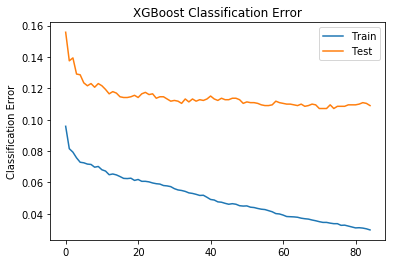

In [251]:
fig, ax = pyplot.subplots()
ax.plot(x_axis, cv_result['train-error-mean'], label='Train')
ax.plot(x_axis, cv_result['test-error-mean'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

## Accuracy Score Analysis

### General Performance Score

In [252]:
# prob predict
y_pred = tuned_model.predict(xg_test)
print(len(y_pred))

655


In [254]:
# Classification prediction
y_pred_class = []
for i in range(len(y_pred)):
    if y_pred[i]>0.5:
        y_pred_class.append(1)
    elif y_pred[i]<=0.5:
        y_pred_class.append(0)
y_pred_class[1:10]    

[1, 0, 0, 0, 1, 1, 1, 1, 1]

In [255]:
accuracy_score(y_test,y_pred_class)

0.86717557251908395

In [256]:
print(classification_report(y_test,y_pred_class,target_names=["female","male"]))

             precision    recall  f1-score   support

     female       0.74      0.84      0.78       189
       male       0.93      0.88      0.90       466

avg / total       0.87      0.87      0.87       655



### Threshold Performance Measures

In [43]:
bi_pred = []
filter_test = []
for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
        bi_pred.append(1)
        filter_test.append(y_test.iloc[i])
    elif y_pred[i] <= 0.5:
        bi_pred.append(0)
        filter_test.append(y_test.iloc[i])

series_pred = pd.Series(bi_pred)
series_test = pd.Series(filter_test)
print(len(series_pred))
result = pd.crosstab(series_test, series_pred, rownames=["Actual"], colnames=["Predicted"])
result

655


Predicted,0,1
Actual,,
0,152,21
1,52,430


# Probability of Being Male Analysis

## Import and Predict un-predicted observations

In [74]:
data = pd.read_csv("ML_dataset_0930.csv")
data.head()

,Unnamed: 0,filename,lawyer_male,percent,max,min,mean,median,stdev,min_in,...,q91,q92,q93,q94,q95,q96,q97,q98,q99,q100
0,1,120222015200547280299,1,0.0,258.11872,105.42314,130.2302,124.03377,29.27223,21.75107,...,136.41411,137.44948,139.11002,150.97418,233.89897,242.42514,253.86877,255.11467,255.86677,259.05867
1,2,12022237318030335018,1,0.0,341.0521,174.30794,229.27221,222.32459,36.14343,28.10591,...,283.20606,284.65229,285.03504,285.14059,294.86228,306.1213,311.62433,318.55998,327.6212,344.57995
2,3,12022237340030114014,1,0.0,190.87783,81.00901,111.19673,108.17011,21.815,28.75928,...,139.80518,141.01955,146.64117,148.4232,150.16875,159.46629,173.48027,175.95107,182.00563,193.21693
3,4,12022237343030224016,1,0.0,133.90526,89.74382,108.61958,105.47788,11.86239,19.00371,...,128.21476,129.12292,130.28582,131.14202,131.73361,132.17219,132.43985,132.61862,132.68908,134.46538
4,5,12022237352030003012,1,0.0,244.77814,51.16954,103.40267,97.34576,23.43879,21.67640,...,128.58647,130.42046,131.86908,132.25946,132.85974,133.49579,133.96456,160.30325,244.39978,244.78109


In [46]:
# select and predict the un-predicted observations
unpredict_obs = xgb.DMatrix(X_test,label=y_test)
prob_male_pred = tuned_model.predict(unpredict_obs)

In [71]:

result_dic = {"gender":y_test,"prob_male":prob_male_pred}
prob_df = pd.DataFrame.from_dict(result_dic)